## Exploratory Data Analysis on Corona Virus

## What is a Corona Virus? 

As listed on WHO website, Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

## Objective: 

Since we see that outbreak of Corona Virus is increasing Day by day, we can explore trends from the given data and try to predict future. 

## Dataset Source: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset



## Exploratory Data Analysis

Let's perform EDA on the dataset.

In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import pycountry
import plotly.graph_objects as go

In [2]:
# Reading the dataset
coronaVirus_df =  pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv",index_col='Last Update', parse_dates=['Last Update'])
coronaVirus_df.tail()

,Sno,Date,Province/State,Country,Confirmed,Deaths,Recovered
Last Update,,,,,,,
2020-01-02 19:43:00,766,02/04/2020 22:00:00,"Boston, MA",US,1.0,0.0,0.0
2020-01-02 19:53:00,767,02/04/2020 22:00:00,"Los Angeles, CA",US,1.0,0.0,0.0
2020-01-02 19:53:00,768,02/04/2020 22:00:00,"Orange, CA",US,1.0,0.0,0.0
2020-01-02 19:43:00,769,02/04/2020 22:00:00,"Seattle, WA",US,1.0,0.0,0.0
2020-01-02 19:43:00,770,02/04/2020 22:00:00,"Tempe, AZ",US,1.0,0.0,0.0


In [3]:
coronaVirus_df.shape

(770, 7)

### Data Cleaning and Transformation

1. Check for missing values and filling missing values
2. Change data type for Last Update column and modify other columns if required. 
3. Remove 'Sno' column as it is not required. 

Checking missing values and transforming data

In [4]:
coronaVirus_df.isnull().values.any()

True

In [5]:
coronaVirus_df.isnull().sum()

Sno                 0
Date                0
Province/State    185
Country             0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [6]:
#replacing null values in Province/State with Country names
coronaVirus_df['Province/State'].fillna(coronaVirus_df['Country'], inplace=True)

In [7]:
coronaVirus_df.drop(['Sno'], axis=1, inplace=True)

In [8]:
#creating new columns for date, month and time which would be helpful for furthur computation
coronaVirus_df['year'] = pd.DatetimeIndex(coronaVirus_df['Date']).year
coronaVirus_df['month'] = pd.DatetimeIndex(coronaVirus_df['Date']).month
coronaVirus_df['time'] = pd.DatetimeIndex(coronaVirus_df['Date']).time

In [9]:
coronaVirus_df.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered,year,month,time
Last Update,,,,,,,,,
2020-01-22 12:00:00,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0,2020,1,12:00:00


> ### Latest Update on number of confirmed, reported and deaths across the globe****

We are trying to analyze number of cases reported.

In [10]:
# A look at the different cases - confirmed, death and recovered
print('Globally Confirmed Cases: ',coronaVirus_df['Confirmed'].sum())
print('Global Deaths: ',coronaVirus_df['Deaths'].sum())
print('Globally Recovered Cases: ',coronaVirus_df['Recovered'].sum())

Globally Confirmed Cases:  123360.0
Global Deaths:  2646.0
Globally Recovered Cases:  3284.0


![](http://)It is seen that total of 123360 confirmed cases have been reported, 2646 deaths have been confirmed and 3284 people have sucessfully fought the virus and are showing signs of recovery. The data is from 22nd Jan to 4th Feb 2020. 

It is important to analyze latest scenario as per the last update so that we can predict numbers in future. 

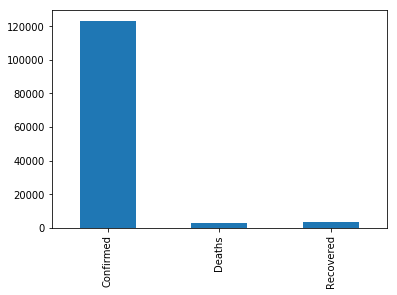

In [11]:
coronaVirus_df[['Confirmed', 'Deaths', 'Recovered']].sum().plot(kind='bar')

### Geographical Widespread of CoronaVirus

Using the given data, Here are few questions which we are going to answer
1. Total number of countries whch are affected by the virus
2. Number of confirmed, recovered, deaths cases reported Country wise
2. Number of confirmed cases reported State/Province wise
3. Top 5 Affected Countries
4. Top 5 countries which are unaffected.
5. Distribution of virus in India and US population. 

In [12]:
# Total Number Of countries which are affected by the virus

coronaVirus_df.Country.unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium'],
      dtype=object)

In [13]:
# Number of confirmed cases reported Country wise

global_confirmed_cases = coronaVirus_df.groupby('Country').sum().Confirmed
global_confirmed_cases.sort_values(ascending=False)

Country
Mainland China          121386.0
China                      549.0
Thailand                   176.0
Japan                      143.0
Singapore                  137.0
Hong Kong                  130.0
South Korea                100.0
Australia                   92.0
Taiwan                      92.0
Macau                       79.0
US                          78.0
Malaysia                    75.0
Germany                     62.0
France                      55.0
Vietnam                     46.0
United Arab Emirates        31.0
Canada                      29.0
Italy                       12.0
India                       11.0
Nepal                       11.0
UK                          10.0
Philippines                 10.0
Russia                      10.0
Sri Lanka                    9.0
Cambodia                     9.0
Finland                      7.0
Sweden                       5.0
Spain                        5.0
Belgium                      1.0
Mexico                       0.0
Iv

In [14]:
global_death_cases = coronaVirus_df.groupby('Country').sum().Deaths
global_death_cases.sort_values(ascending=False)

Country
Mainland China          2641.0
Philippines                4.0
Hong Kong                  1.0
Macau                      0.0
Belgium                    0.0
Brazil                     0.0
Cambodia                   0.0
Canada                     0.0
China                      0.0
Finland                    0.0
France                     0.0
Germany                    0.0
India                      0.0
Italy                      0.0
Ivory Coast                0.0
Japan                      0.0
Vietnam                    0.0
United Arab Emirates       0.0
Malaysia                   0.0
Mexico                     0.0
Nepal                      0.0
Russia                     0.0
Singapore                  0.0
South Korea                0.0
Spain                      0.0
Sri Lanka                  0.0
Sweden                     0.0
Taiwan                     0.0
Thailand                   0.0
UK                         0.0
US                         0.0
Australia                  0.0


In [15]:
global_recovered_cases = coronaVirus_df.groupby('Country').sum().Recovered
global_recovered_cases.sort_values(ascending=False)

Country
Mainland China          3212.0
Thailand                  46.0
Australia                 12.0
Japan                     10.0
Vietnam                    4.0
Belgium                    0.0
Brazil                     0.0
Cambodia                   0.0
Canada                     0.0
China                      0.0
Finland                    0.0
France                     0.0
Germany                    0.0
Hong Kong                  0.0
India                      0.0
Italy                      0.0
Ivory Coast                0.0
UK                         0.0
US                         0.0
United Arab Emirates       0.0
Malaysia                   0.0
Mexico                     0.0
Nepal                      0.0
Philippines                0.0
Russia                     0.0
Singapore                  0.0
South Korea                0.0
Spain                      0.0
Sri Lanka                  0.0
Sweden                     0.0
Taiwan                     0.0
Macau                      0.0


Text(0.5, 0, 'Date')

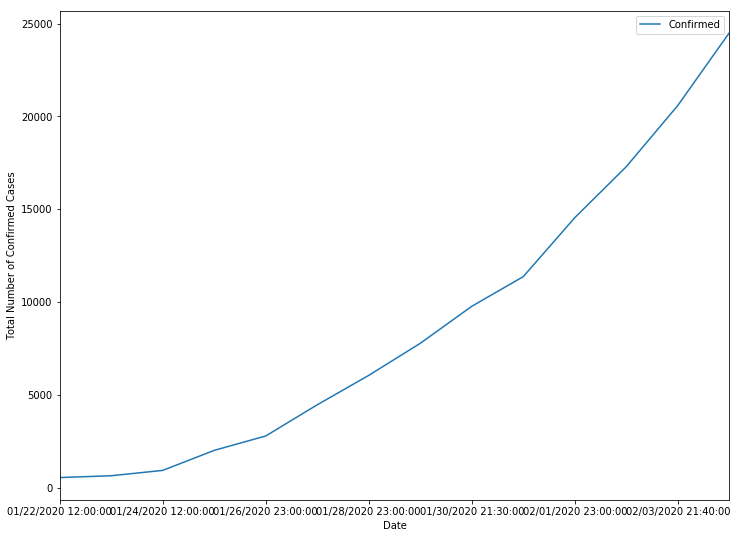

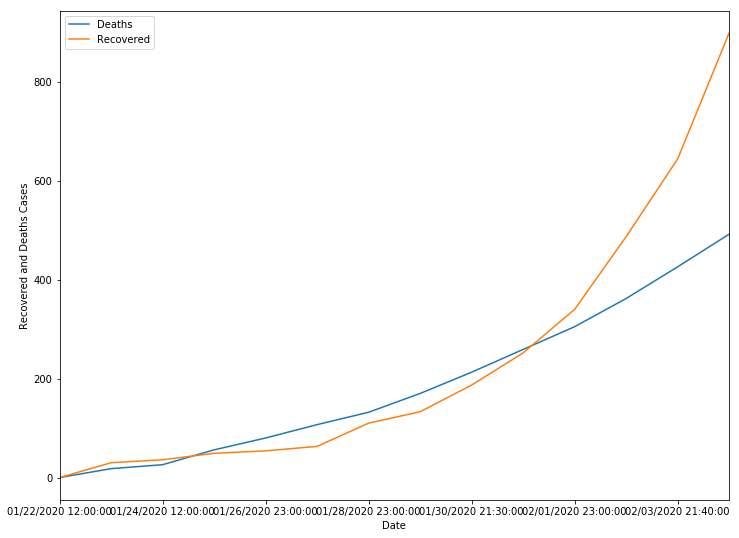

In [16]:
#plotting graphs for total Confirmed, Death and Recovery cases
plt.rcParams["figure.figsize"] = (12,9)
ax1 = coronaVirus_df[['Date','Confirmed']].groupby(['Date']).sum().plot()
ax1.set_ylabel("Total Number of Confirmed Cases")
ax1.set_xlabel("Date")

ax2 = coronaVirus_df[['Date','Deaths', 'Recovered']].groupby(['Date']).sum().plot()
ax2.set_ylabel("Recovered and Deaths Cases")
ax2.set_xlabel("Date")

In [17]:

fig = px.scatter_matrix(coronaVirus_df, dimensions=["Confirmed"], color="Date")
fig.show()

In [18]:
fig = px.scatter_matrix(coronaVirus_df, dimensions=["Recovered", "Deaths"], color="Date")
fig.show()

In [19]:
# Let's look the various Provinces/States affected

data_countryprovince = coronaVirus_df.groupby(['Country','Province/State']).sum()
data_countryprovince.sort_values(by='Confirmed',ascending=False)

Confirmed  Deaths  Recovered   year  month
Country        Province/State                                            
Mainland China Hubei             77732.0  2546.0     2075.0  26260     17
               Zhejiang           5382.0     0.0      204.0  26260     17
               Guangdong          4815.0     0.0      126.0  26260     17
               Henan              4079.0    19.0       88.0  26260     17
               Hunan              3702.0     0.0       86.0  26260     17
...                                  ...     ...        ...    ...    ...
Ivory Coast    Ivory Coast           0.0     0.0        0.0   2020      1
Mexico         Mexico                0.0     0.0        0.0   2020      1
China          Jilin                 0.0     0.0        0.0   2020      1
               Inner Mongolia        0.0     0.0        0.0   2020      1
               Tibet                 0.0     0.0        0.0   2020      1

[115 rows x 5 columns]

In [20]:
# Top Affected countries

top_affected_countries = global_confirmed_cases.sort_values(ascending=False)
top_affected_countries.head(5)

Country
Mainland China    121386.0
China                549.0
Thailand             176.0
Japan                143.0
Singapore            137.0
Name: Confirmed, dtype: float64

In [21]:
# Finding countries which are relatively safe due to less number of reported cases
top_unaffected_countries = global_confirmed_cases.sort_values(ascending=True)
top_unaffected_countries.head(5)

Country
Brazil         0.0
Ivory Coast    0.0
Mexico         0.0
Belgium        1.0
Spain          5.0
Name: Confirmed, dtype: float64

Above list are unaffected countries which means that relative to other countries, there are very less number of cases reported. These countries should take all measures to prevent spreading the virus.

### Plotting cases confirmed in China

In [22]:
#Mainland China
China_data = coronaVirus_df[coronaVirus_df['Country']=='China']
China_data

,Date,Province/State,Country,Confirmed,Deaths,Recovered,year,month,time
Last Update,,,,,,,,,
2020-01-22 12:00:00,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Guangdong,China,26.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Guangxi,China,2.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Guizhou,China,1.0,0.0,0.0,2020,1,12:00:00
2020-01-22 12:00:00,01/22/2020 12:00:00,Hainan,China,4.0,0.0,0.0,2020,1,12:00:00


In [23]:
x = China_data.groupby('Province/State')['Confirmed'].sum().sort_values().tail(15)

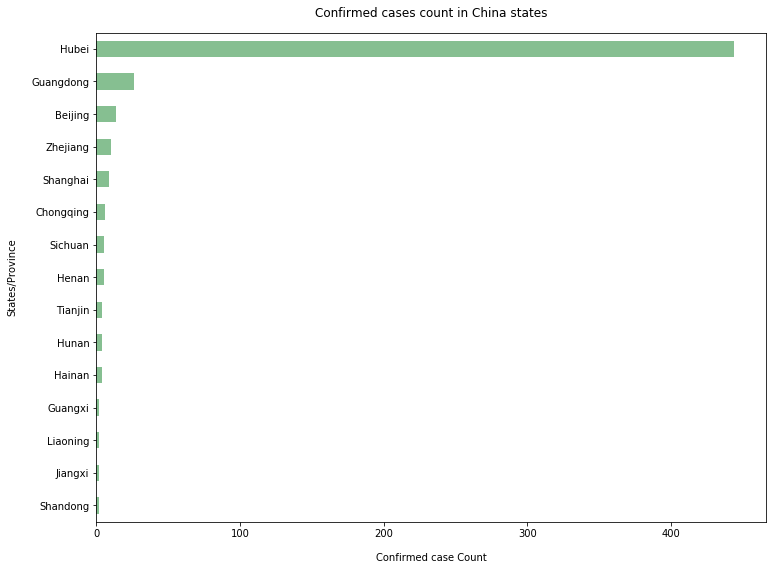

In [24]:
x.plot(kind='barh', color='#86bf91')
plt.xlabel("Confirmed case Count", labelpad=14)
plt.ylabel("States/Province", labelpad=14)
plt.title("Confirmed cases count in China states", y=1.02);

1. > ### ****Geographical Distribution in India and US ****

> Now let's understand distribution of virus in US population

In [25]:
US_data = coronaVirus_df[coronaVirus_df['Country']=='US']
US_data

,Date,Province/State,Country,Confirmed,Deaths,Recovered,year,month,time
Last Update,,,,,,,,,
2020-01-22 12:00:00,01/22/2020 12:00:00,Washington,US,1.0,0.0,0.0,2020,1,12:00:00
2020-01-23 12:00:00,01/23/2020 12:00:00,Washington,US,1.0,0.0,0.0,2020,1,12:00:00
2020-01-24 12:00:00,01/24/2020 12:00:00,Washington,US,1.0,0.0,0.0,2020,1,12:00:00
2020-01-24 12:00:00,01/24/2020 12:00:00,Chicago,US,1.0,0.0,0.0,2020,1,12:00:00
2020-01-25 12:00:00,01/25/2020 22:00:00,Washington,US,1.0,0.0,0.0,2020,1,22:00:00
2020-01-25 12:00:00,01/25/2020 22:00:00,Illinois,US,1.0,0.0,0.0,2020,1,22:00:00
2020-01-26 23:00:00,01/26/2020 23:00:00,Washington,US,1.0,0.0,0.0,2020,1,23:00:00
2020-01-26 23:00:00,01/26/2020 23:00:00,Illinois,US,1.0,0.0,0.0,2020,1,23:00:00
2020-01-26 23:00:00,01/26/2020 23:00:00,California,US,2.0,0.0,0.0,2020,1,23:00:00


In [26]:
x = US_data.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False).tail(20)
x

Province/State
California         13.0
Washington         10.0
Illinois            9.0
Chicago, IL         8.0
Santa Clara, CA     7.0
Arizona             6.0
Tempe, AZ           4.0
Seattle, WA         4.0
San Benito, CA      4.0
Orange, CA          4.0
Los Angeles, CA     4.0
Boston, MA          4.0
Chicago             1.0
Name: Confirmed, dtype: float64

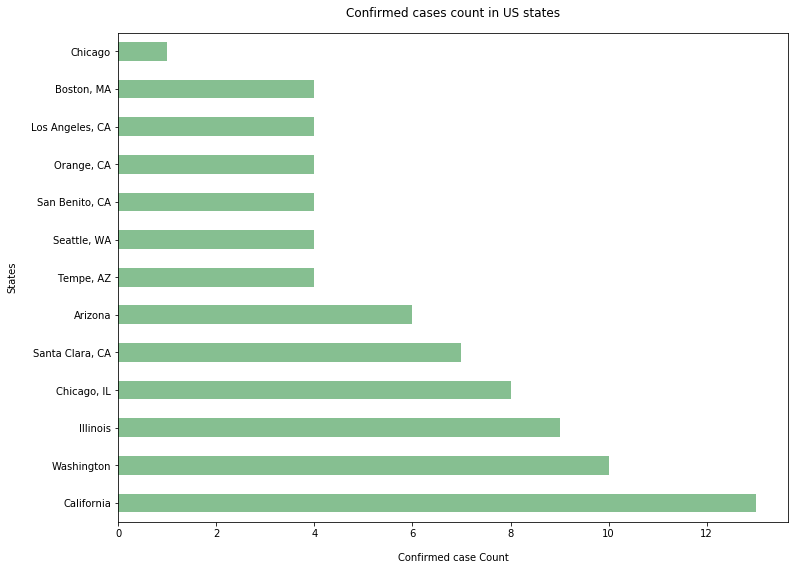

In [27]:
x.plot(kind='barh', color='#86bf91')
plt.xlabel("Confirmed case Count", labelpad=14)
plt.ylabel("States", labelpad=14)
plt.title("Confirmed cases count in US states", y=1.02);

In [28]:
India_data = coronaVirus_df[coronaVirus_df['Country']=='India']
India_data

,Date,Province/State,Country,Confirmed,Deaths,Recovered,year,month,time
Last Update,,,,,,,,,
2020-01-30 21:30:00,01/30/2020 21:30:00,India,India,1.0,0.0,0.0,2020,1,21:30:00
2020-01-31 19:00:00,01/31/2020 19:00:00,India,India,1.0,0.0,0.0,2020,1,19:00:00
2020-01-31 08:15:00,02/01/2020 23:00:00,India,India,1.0,0.0,0.0,2020,2,23:00:00
2020-02-02 06:03:00,02/02/2020 21:00:00,India,India,2.0,0.0,0.0,2020,2,21:00:00
2020-03-02 21:43:00,02/03/2020 21:40:00,India,India,3.0,0.0,0.0,2020,2,21:40:00
2020-03-02 21:43:00,02/04/2020 22:00:00,India,India,3.0,0.0,0.0,2020,2,22:00:00


In [29]:
import plotly.express as px
#India_data = px.data.gapminder().query("country == 'India'")
fig = px.bar(US_data, x='Province/State', y='Confirmed')
fig.show()

## Time Series Analysis

It is important to understand correlation of time and cases reported. 

In [30]:
# Using plotly.express
import plotly.express as px

import pandas as pd

fig = px.line(coronaVirus_df, x='Date', y='Confirmed')
fig.show()

In [31]:

fig = px.line(coronaVirus_df, x='Date', y='Deaths')
fig.show()

In [32]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=coronaVirus_df['Date'],
                y=coronaVirus_df['Confirmed'],
                name="Confirmed",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=coronaVirus_df['Date'],
                y=coronaVirus_df['Recovered'],
                name="Recovered",
                line_color='dimgray',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=coronaVirus_df['Date'],
                y=coronaVirus_df['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-22','2020-02-03'],
                  title_text="Cases over time")
fig.show()

In [33]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=coronaVirus_df['Date'],
                y=coronaVirus_df['Recovered'],
                name="Recovered",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=coronaVirus_df['Date'],
                y=coronaVirus_df['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-22 00:00:00','2020-02-03 23:59:59'],
                  title_text="Recovered vs Deaths over time in China")
fig.show()

In [34]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=coronaVirus_df.time,
                y=coronaVirus_df['Confirmed'],
                name="Confirmed",
                line_color='deepskyblue',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-31','2020-02-03'],
                  title_text="Confirmed Cases over time")
fig.show()

As of now this is our EDA. We need to predict future cases and build models which will be coming soon. 

## References

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

https://www.who.int/health-topics/coronavirus

https://plot.ly/python/time-series/

